# Part 1:  Linear regression

Applying Linear Regression to the scikit-learn diabetes datasets

We import all the libraries we are going to need

In [1]:
from sklearn import linear_model, datasets, metrics, model_selection
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import pandas as pd

We will use the diabetes dataset. Let's a look at its structure.

In [2]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

What is the shape of our data? Of our targets? What are the distinct features?

In [3]:
diabetes.data.shape, diabetes.target.shape, diabetes.feature_names

((442, 10),
 (442,),
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

Our dataset contains a description. Let's read through it.

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

We will now predict the dataset targets based on the second feature. We create a feature array (X) and a targets array (Y). 

In [5]:
X = diabetes.data[:, np.newaxis, 2]
Y = diabetes.target
X, Y

(array([[ 0.06169621],
        [-0.05147406],
        [ 0.04445121],
        [-0.01159501],
        [-0.03638469],
        [-0.04069594],
        [-0.04716281],
        [-0.00189471],
        [ 0.06169621],
        [ 0.03906215],
        [-0.08380842],
        [ 0.01750591],
        [-0.02884001],
        [-0.00189471],
        [-0.02560657],
        [-0.01806189],
        [ 0.04229559],
        [ 0.01211685],
        [-0.0105172 ],
        [-0.01806189],
        [-0.05686312],
        [-0.02237314],
        [-0.00405033],
        [ 0.06061839],
        [ 0.03582872],
        [-0.01267283],
        [-0.07734155],
        [ 0.05954058],
        [-0.02129532],
        [-0.00620595],
        [ 0.04445121],
        [-0.06548562],
        [ 0.12528712],
        [-0.05039625],
        [-0.06332999],
        [-0.03099563],
        [ 0.02289497],
        [ 0.01103904],
        [ 0.07139652],
        [ 0.01427248],
        [-0.00836158],
        [-0.06764124],
        [-0.0105172 ],
        [-0

We now split our data into 25% test set and 75% training set (default configuration)

In [6]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y)
x_train.shape, x_test.shape

((331, 1), (111, 1))

We create a linear model in order to predict and fit the model on the training data.

In [7]:
linearRegressionModel = linear_model.LinearRegression()

In [8]:
linearRegressionModel.fit(x_train, y_train)

LinearRegression()

We extract predictions out of it using our test data.

In [9]:
y_predicted = linearRegressionModel.predict(x_test)
y_predicted

array([ 96.99888989, 174.47808036, 172.46563386, 159.38473157,
        86.93665736, 186.5527594 ,  66.8121923 , 151.33494555,
       122.15447121, 186.5527594 , 183.53408964, 278.11907541,
       127.18558748, 131.21048049, 147.31005253,  95.99266664,
       111.08601543, 146.30382928, 119.13580145,  92.97399688,
       116.1171317 , 253.96971734, 202.65233144, 128.19181073,
       132.21670374, 107.06112242, 207.68344771, 144.29138278,
       135.2353735 , 142.27893627, 154.35361531, 300.25598697,
       140.26648976, 142.27893627, 120.14202471, 175.48430362,
       207.68344771,  70.83708532, 168.44074085, 118.1295782 ,
       111.08601543, 188.5652059 , 191.58387566, 151.33494555,
        96.99888989,  95.99266664, 309.31199625, 126.17936422,
       184.54031289, 110.07979218, 128.19181073, 156.36606181,
        90.96155037, 131.21048049, 213.72078723, 176.49052687,
       154.35361531, 144.29138278, 142.27893627, 236.86392204,
       189.57142916, 142.27893627,  87.94288061, 178.50

Let's draw some metrics. What is the correlation between all features of our dataset?

We use a heatmap to visualize it.

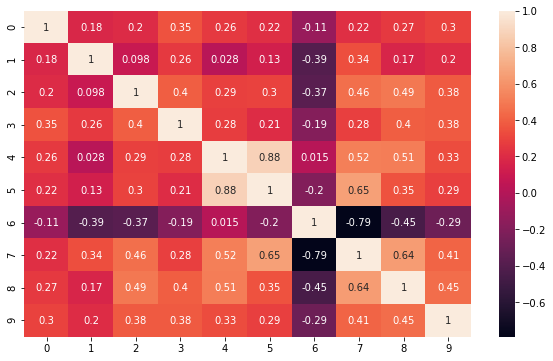

In [10]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(stats.spearmanr(diabetes.data)[0], annot=True);
# pd.DataFrame(features, columns=diabetes_ds.feature_names).corr()

What is the MSE between our predictions and the true targets?

In [11]:
metrics.mean_squared_error(y_test, y_predicted)

3985.5747940285814

And what is the r2 score (accuracy of fit) of our model?

In [12]:
metrics.r2_score(y_test, y_predicted)
# linearRegressionModel.score(x_test, y_test)

0.37322357359326663

We will now plot the feature array of the test set against its targets. The feature array contains a single feature, which fits on the X axis perfectly.

In [13]:
x_test

array([[-0.05686312],
       [ 0.02612841],
       [ 0.02397278],
       [ 0.00996123],
       [-0.06764124],
       [ 0.03906215],
       [-0.08919748],
       [ 0.00133873],
       [-0.02991782],
       [ 0.03906215],
       [ 0.03582872],
       [ 0.13714305],
       [-0.02452876],
       [-0.02021751],
       [-0.00297252],
       [-0.05794093],
       [-0.04177375],
       [-0.00405033],
       [-0.03315126],
       [-0.06117437],
       [-0.03638469],
       [ 0.11127556],
       [ 0.05630715],
       [-0.02345095],
       [-0.0191397 ],
       [-0.046085  ],
       [ 0.06169621],
       [-0.00620595],
       [-0.01590626],
       [-0.00836158],
       [ 0.00457217],
       [ 0.16085492],
       [-0.0105172 ],
       [-0.00836158],
       [-0.03207344],
       [ 0.02720622],
       [ 0.06169621],
       [-0.08488624],
       [ 0.01966154],
       [-0.03422907],
       [-0.04177375],
       [ 0.04121778],
       [ 0.04445121],
       [ 0.00133873],
       [-0.05686312],
       [-0

We plot our model's predictions in black (line) against the true, blue targets of each item.

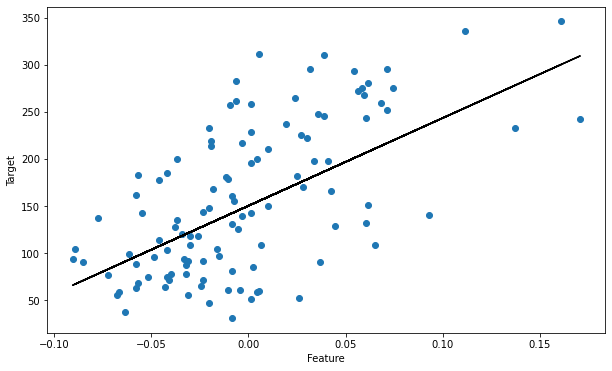

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predicted, color='black')
plt.xlabel('Feature')
plt.ylabel('Target');